# What is Machine Learning?

Machine Learning can be considered a subfield of Artificial Intelligence since those algorithms can be seen as building blocks to make computers learn to behave more intelligently by somehow generalizing rather that just storing and retrieving data items like a database system would do.

Learning problems fall into a few categories: <br>
**supervised learning**, in which the data comes with additional attributes that we want to predict.This problem can be either:<br>
- **classification:** samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.<br>
- **regression:** if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

**unsupervised learning**, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.

# SciKit-Learn
Scikit learn is another python dataset that data scientists use to do machine learning and other related things to it such as feature extraction or dimensionality reductions and so on. Note that this is not a machine learning class so you won't be learning machine learning and all its tricks. However, you will get an idea on how to use some python libraries to do machine learning. When the time comes for machine learning class, you will have a more intense and deeper details about the different expressions and info related to machine learning.

You can load your data using Pandas and you can also use some pre-loaded data in scikit already. Data consists of samples/records which are the rows and columns which are the features. In addition, for supervised learning, it will have another field called the target

This session will cover the basics of Scikit-Learn, a popular package containing a collection of tools for machine learning written in Python. See more at http://scikit-learn.org.

# Loading an example dataset

Text(0.5, 1.0, 'labeled as 1')

<Figure size 432x288 with 0 Axes>

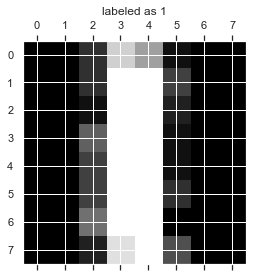

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
digits = datasets.load_digits()
plt.gray() 
plt.matshow(digits.images[1050]) 
plt.title('labeled as '+str(digits.target[1050]))

In [5]:
house_prices=datasets.load_boston()
print(house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Dimensionality Reduction
One of the important practices when working with the data is to do dimensionality reduction. This is important as often you would have some features that are completetly dependant on others or redundant in other cases. Processing the data with those features in play leads to an unnecessary overhead in processing and in some rare cases, wrong reslults and interpretations. One of the famous algorithms to reduce dimensionality is called principle component analysis (PCA). Which basically gets rid of dependencies and can help you re-represent the data using its eigen vectors in lower number of dimensions without losing many information. Scikit-learn provide an easy way to do PCA.


(1797, 64)

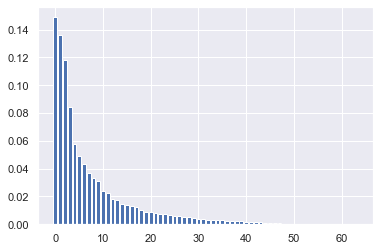

In [6]:
from sklearn.decomposition import PCA
import numpy as np
# Create a regular PCA model 
pca_all = PCA()
reduced_data_pca = pca_all.fit_transform(digits.data)
pca_all.explained_variance_ratio_
plt.bar(np.arange(64),pca_all.explained_variance_ratio_)
reduced_data_pca.shape

As you can see, the PCA has transformed the data and shows you the significant of each of the new dimensions. The new shape is still the same as the old one as without specifying, PCA keeps all the info regardless how insignificant it is. From the figure, it looks like after dimension 30 there is no much significant so we can take only the first 30 dimensions or also do another PCA where we specify the number of output dimensions to be 30

<BarContainer object of 30 artists>

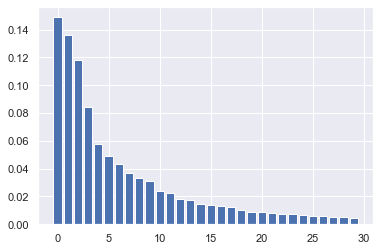

In [7]:
pca = PCA(n_components=30)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape
plt.bar(np.arange(30),pca.explained_variance_ratio_)


# Unsupervised Learning


In [8]:
# This is our data, here we created it but we usually it is given to us
X = np.array([[5,3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])
X

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 45],
       [85, 70],
       [71, 80],
       [60, 78],
       [55, 52],
       [80, 91]])

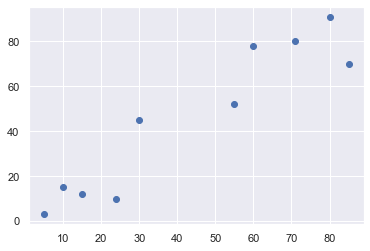

In [9]:
# Let's Visualize our Data
plt.scatter(X[:,0],X[:,1], label='True Position')  

How many clusters does it look like we have here?

[[16.8 17. ]
 [70.2 74.2]]
[0 0 0 0 0 1 1 1 1 1]


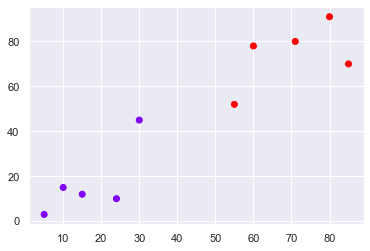

In [10]:
# lets form our clusters
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)  
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  

[[13.5  10.  ]
 [74.   79.75]
 [42.5  48.5 ]]
[0 0 0 0 2 1 1 1 2 1]


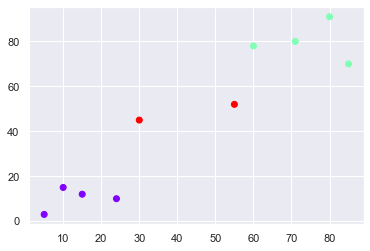

In [11]:
# Now lets try with 3 clusters
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  


Let's take another example

C:\Users\Brady\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


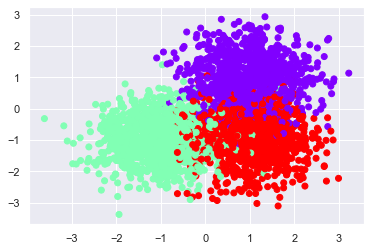

In [12]:
##############################################################################
# Generate sample data as blobs
from sklearn.datasets.samples_generator import make_blobs
np.random.seed(0)
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)
plt.scatter(X[:,0],X[:,1],  c=labels_true, cmap='rainbow')  

In [13]:
# lets do kmeans with 3 clusters
k_means_blobs = KMeans(n_clusters=3, random_state=0)
k_means_blobs.fit(X)
print(k_means_blobs.cluster_centers_)
print(np.unique(k_means_blobs.labels_))
k_means_blobs.labels_.shape

[[-1.07688113 -1.00652871]
 [ 1.06982941 -1.06702419]
 [ 0.96854179  1.01844206]]
[0 1 2]


(3000,)

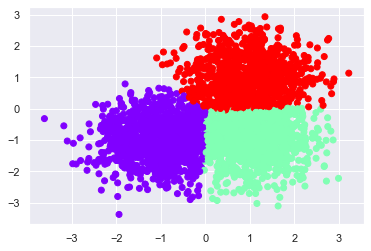

In [14]:
plt.scatter(X[:,0],X[:,1],  c=k_means_blobs.labels_, cmap='rainbow')  

Because k-means knows nothing about the identity of the cluster, the labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [15]:
# This is to match the label name with the outcome labels from kmeans
from scipy.stats import mode
clusters=k_means_blobs.labels_
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(labels_true[mask])[0]

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(labels_true, labels)
cm

array([[926,  10,  64],
       [ 13, 933,  54],
       [ 86,  69, 845]], dtype=int64)

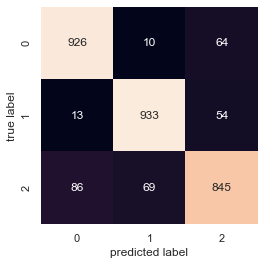

In [17]:
# if you want to plot confusion matrix
import seaborn as sns; sns.set()  # for plot styling
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1,2],
            yticklabels=[0,1,2])
plt.ylabel('true label')
plt.xlabel('predicted label');

# Linear Regression
This is your first supervised learning. In linear regression, we fit a linear model using our data and its features. The target is that we come up with a model that predicts the value such as (house price, salary, .. etc) based on attributes (number of rooms, education, experience, .. etc). In the following example we will use boston housing data in Scikit Learn

In [38]:
from sklearn.datasets import load_boston
data = load_boston()

We will treat this as a normal data scientist task. Basically you get the data and you know nothing about it and you would like to understand it more. Best way to understand it is to use some print statements and visualization

Housing Data Shape (506, 13)
Price Data Shape (506,)


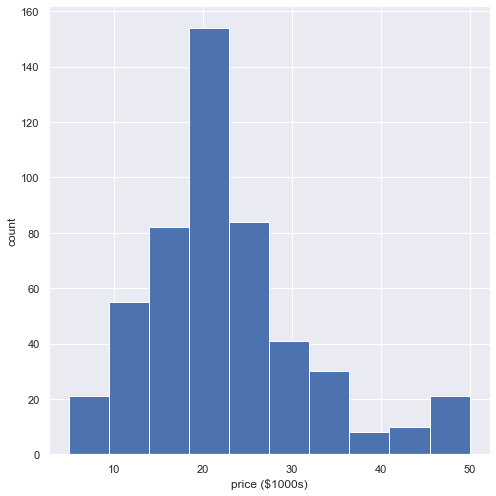

In [39]:
print('Housing Data Shape', data.data.shape)
print('Price Data Shape', data.target.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

Scatter plots can be very helpful in revealing trends and patterns

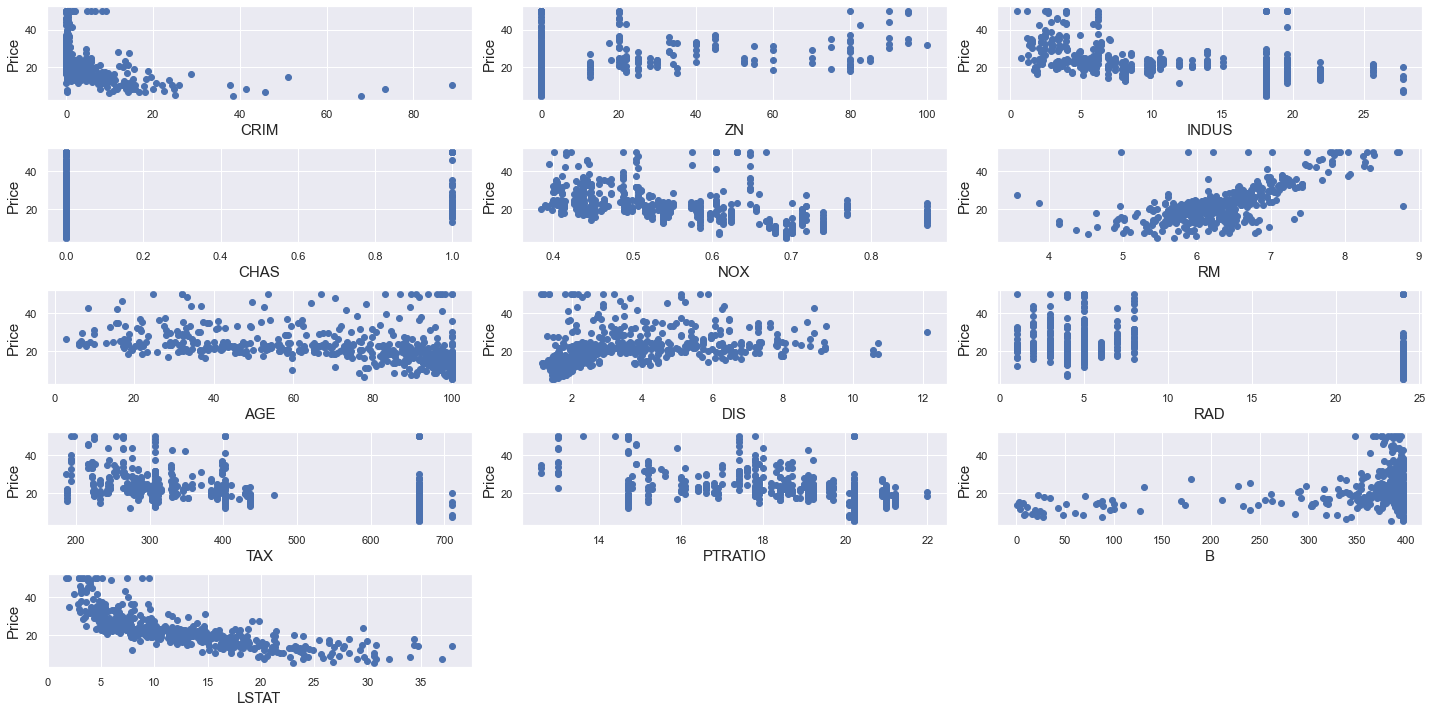

In [40]:
plt.figure(figsize=(20,10))
for index, feature_name in enumerate(data.feature_names):
    plt.subplot(5,3,index+1)
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

A major step now is to split your data into two groups. One is called training set and the other is called validation set. Training is for model to learn from. Validation will only be used to test the performance of your model. This means that the model has never seen your validation data while it was learning and it is currently only being used for prediction and testing if the model can generalize or not. Your model will generaly do well in predicting the data it used to learn from (think about a kid learning from a set of pics). However, if your model learnt well, it can predict well for data that it has not seen to learn (generalize). Similarly, a kid should be able to apply what they learnt on other pics.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
# default is it splits the data into 25% validation and 75% training

Now we are ready. As usual, we build the model then use data to fit it. And finally, we can use it to predict new samples

In [42]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

If your model works well, then predicted price should be approximately equal to the true prices. i.e. data shall fit nicely around a line with slope of 1

Text(0, 0.5, 'Predicted price ($1000s)')

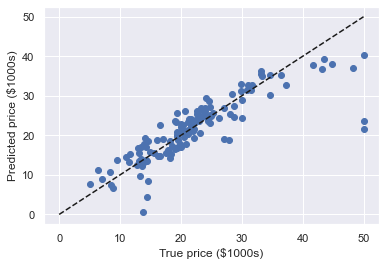

In [43]:
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

To check how close the predicted data is to the true data, in regression, we use a metric called mean square error or MSE. 

In [24]:
import numpy as np
print("MSE: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

MSE: 5.407856079510898 


# Logistic Regression

Logistic regression is another form of supervised learning. Earlier, we were predicting values. In logistic regression, we predict classes (labels). Such as is this a dog or a tree or a cat. Another example, should we approve a loan or not. The answer of the logistic regression will be how likely a data point belongs to a class. The following example, we will use the handwritten digits to train a logistic regression model to learn the digit written

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


Once again, we have to split our data

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

Again we build the model then fit it with data

In [27]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\Brady\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

And finally we predict for the validation set. To calculate how good our model is, you simply count how many we guessed right vs how many we guessed wrong and that is called the score or accuracy

In [28]:
predictions = logisticRegr.predict(x_test)
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


Confusion matrix is a good way to show which classes did we get wrong and when we got wrong which other labels did the model confuse it with

In [29]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


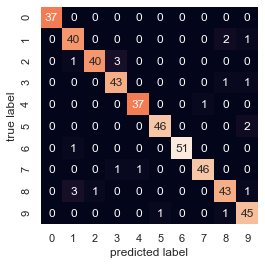

In [30]:
import seaborn as sns; sns.set()  # for plot styling
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(10),
            yticklabels=range(10))
plt.ylabel('true label')
plt.xlabel('predicted label');

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
load_iris
x, y = iris.data, iris.target

NameError: name 'iris' is not defined

In [ ]:
x

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
